In [1]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()


In [2]:
from keras.datasets import mnist
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.compat.v1.keras.optimizers import Adam

import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
(X_Train,_),(_,_) = mnist.load_data()

In [4]:
X_Train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_Train[0],cmap='gray')
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

In [6]:
## Normalize

X_Train=(X_Train.astype("float32")-127.5)/127.5

In [7]:
print(np.min(X_Train))
print(np.max(X_Train))

print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [8]:
TOTAL_EPOCHS=50
BATCH_SIZE=256
HALF_BATCH=128

NO_OF_BATCHES=int(X_Train.shape[0]/BATCH_SIZE)
Noise_Dim=100

adam=Adam(lr=2e-4,beta_1=0.5)

In [9]:
X_Train=X_Train.reshape((-1,784))

## Generator

In [10]:
generator=Sequential()
generator.add(Dense(256,input_shape=(Noise_Dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(256))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(656))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss="binary_crossentropy",optimizer=adam)

generator.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________

## Discriminator

In [11]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(32))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss="binary_crossentropy",optimizer=adam)

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [12]:
## GAN

discriminator.trainable=False
gan_in=Input(shape=(Noise_Dim,))
g_img=generator(gan_in)
g_out=discriminator(g_img)

model=Model(gan_in,g_out)

model.compile(loss='binary_crossentropy',optimizer=adam)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1074848   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 576513    
Total params: 1,651,361
Trainable params: 1,074,848
Non-trainable params: 576,513
_________________________________________________________________


In [13]:
def save_img(epoch,sample=100):
    
    noise=np.random.normal(0,1,size=(sample,Noise_Dim))
    img=generator.predict(noise)
    img=img.reshape((-1,28,28))
    
    plt.figure(figsize=(10,10))
    
    for i in range(sample):
        plt.subplot(10,10,i+1)
        plt.imshow(img[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"./images/saved_epoch_{epoch+1}.png")

In [14]:
!mkdir images

A subdirectory or file images already exists.


In [15]:
%ls

 Volume in drive C is Dibakar
 Volume Serial Number is EC56-6BEE

 Directory of C:\Users\Dibakar Chaudhary\Desktop\Projecrs\MNIST_GANS

05/10/2020  12:16 PM    <DIR>          .
05/10/2020  12:16 PM    <DIR>          ..
05/07/2020  01:19 PM    <DIR>          .ipynb_checkpoints
05/10/2020  12:16 PM    <DIR>          images
05/10/2020  12:16 PM    <DIR>          model
05/10/2020  12:16 PM            16,148 Untitled.ipynb
               1 File(s)         16,148 bytes
               5 Dir(s)  231,589,203,968 bytes free


## Training

[INFO] : Epoch 1 Disc Loss 0.5742 Generator Loss 1.2450
[INFO] : Epoch 2 Disc Loss 0.5145 Generator Loss 2.5222
[INFO] : Epoch 3 Disc Loss 0.5174 Generator Loss 2.9907
[INFO] : Epoch 4 Disc Loss 0.5070 Generator Loss 2.9801
[INFO] : Epoch 5 Disc Loss 0.4935 Generator Loss 3.1317
[INFO] : Epoch 6 Disc Loss 0.4784 Generator Loss 3.1374
[INFO] : Epoch 7 Disc Loss 0.4857 Generator Loss 2.8707
[INFO] : Epoch 8 Disc Loss 0.5099 Generator Loss 2.5608
[INFO] : Epoch 9 Disc Loss 0.5211 Generator Loss 2.4075
[INFO] : Epoch 10 Disc Loss 0.5276 Generator Loss 2.3365
[INFO] : Epoch 11 Disc Loss 0.5310 Generator Loss 2.2409
[INFO] : Epoch 12 Disc Loss 0.5197 Generator Loss 2.2697
[INFO] : Epoch 13 Disc Loss 0.5313 Generator Loss 2.1708
[INFO] : Epoch 14 Disc Loss 0.5336 Generator Loss 2.1280
[INFO] : Epoch 15 Disc Loss 0.5385 Generator Loss 2.1019
[INFO] : Epoch 16 Disc Loss 0.5388 Generator Loss 2.1274
[INFO] : Epoch 17 Disc Loss 0.5321 Generator Loss 2.0911
[INFO] : Epoch 18 Disc Loss 0.5387 Gener

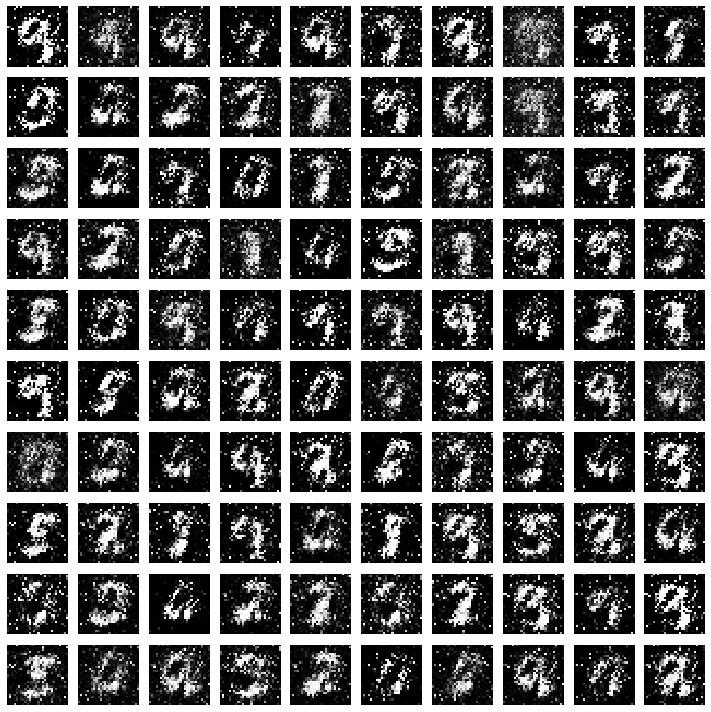

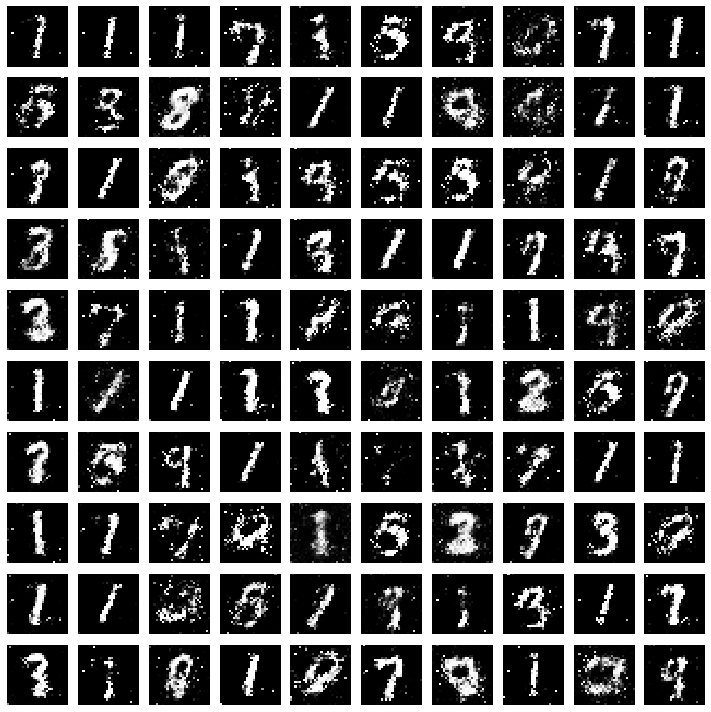

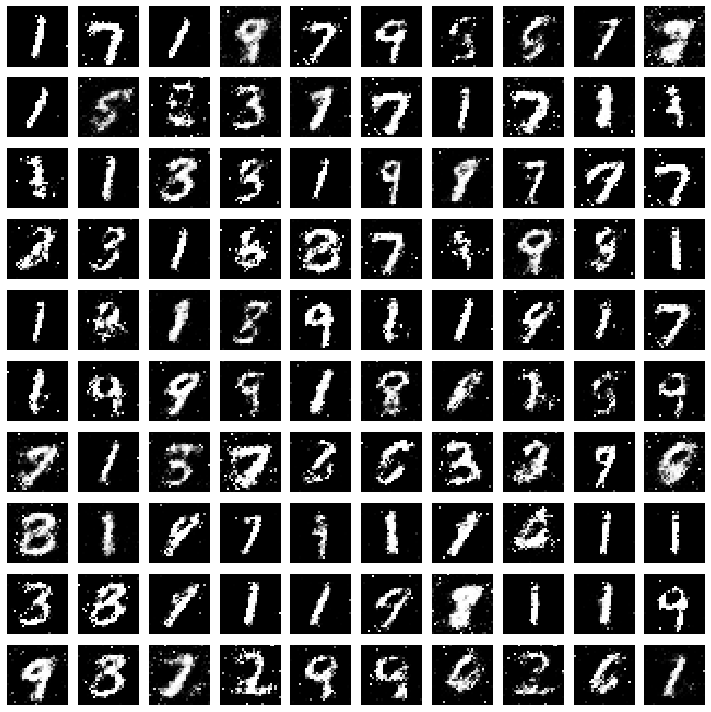

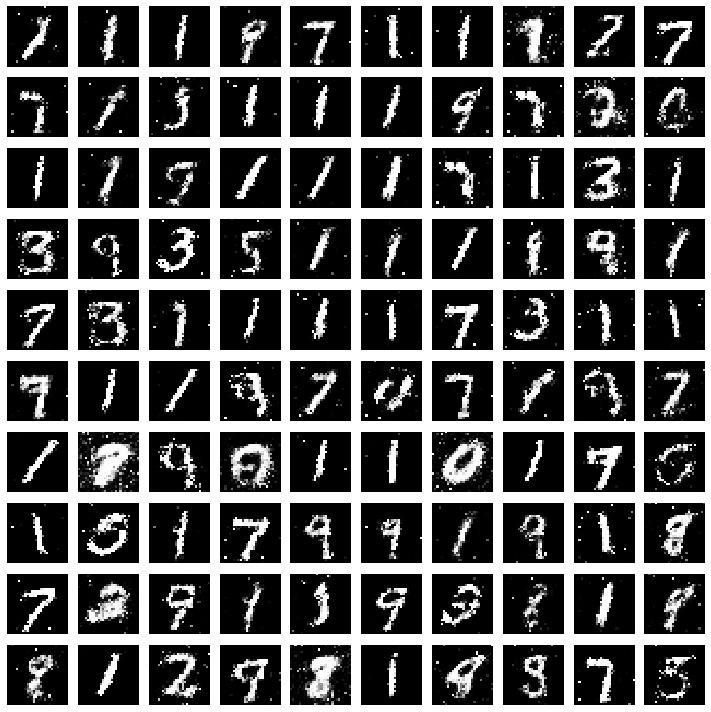

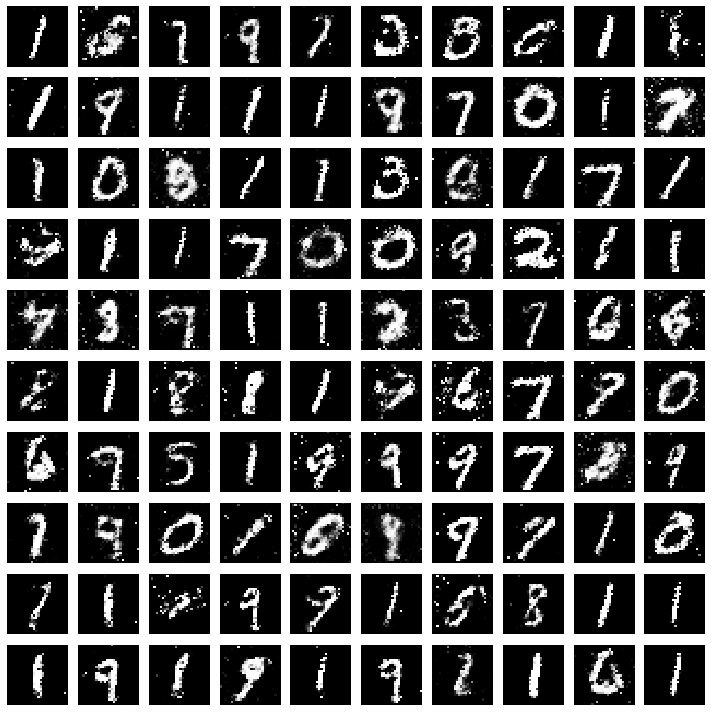

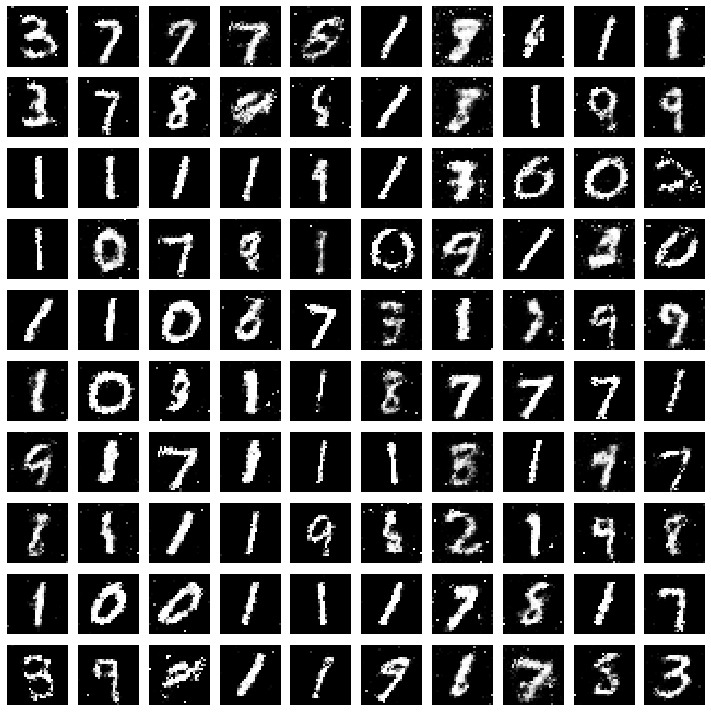

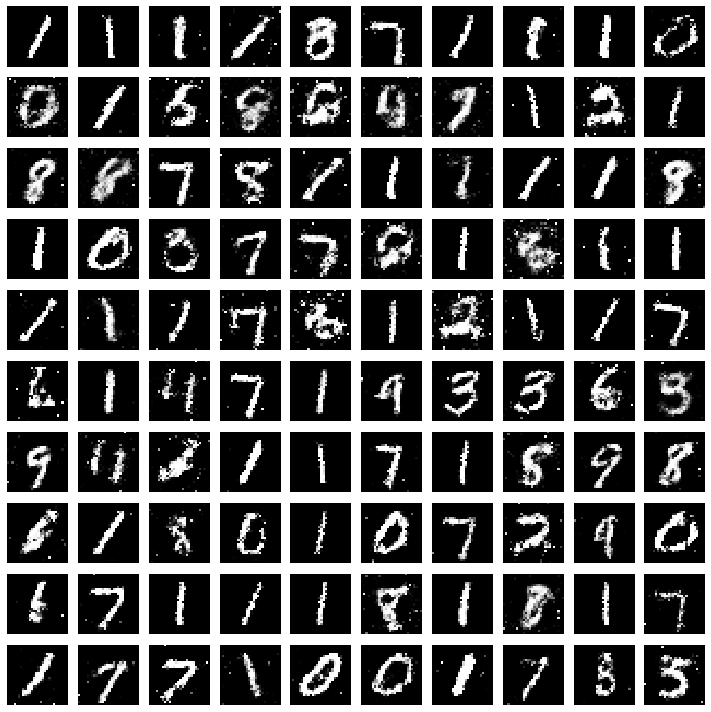

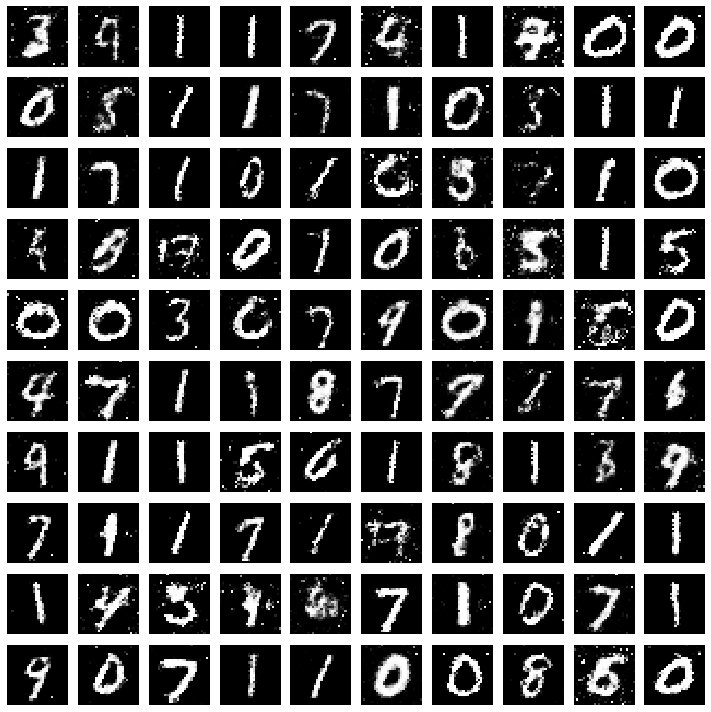

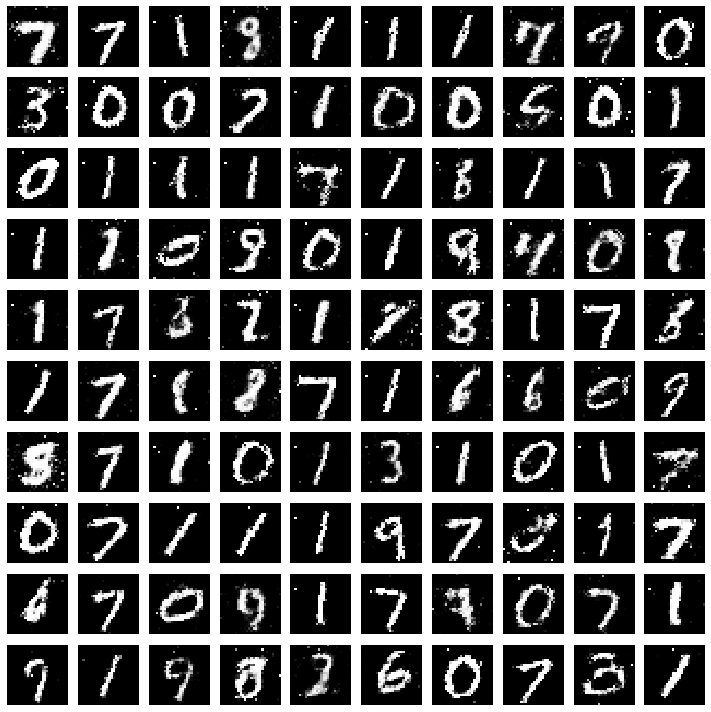

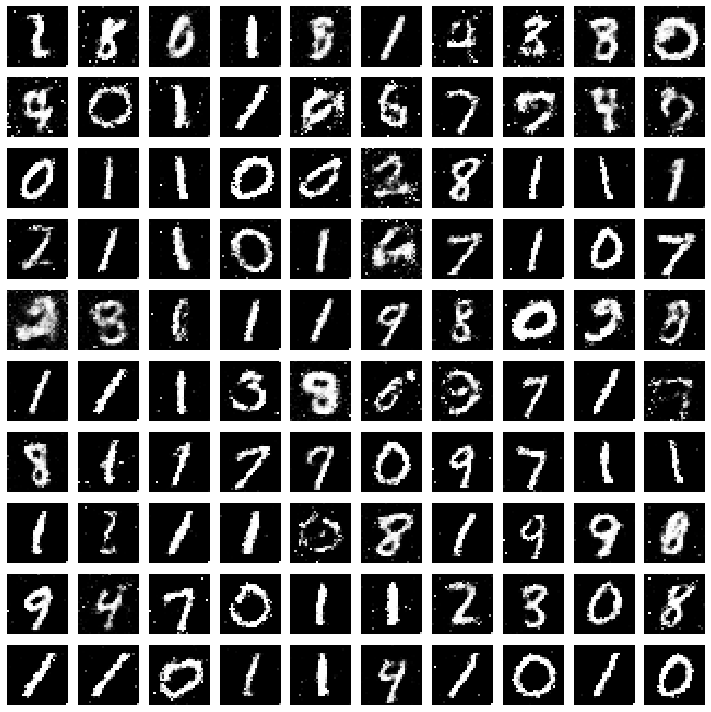

In [16]:
g_losses=[]
d_losses=[]

for i in range(TOTAL_EPOCHS) :
    epoch_d_loss=0.0
    epoch_g_loss=0.0
    
    for step in range(BATCH_SIZE) :
        
        idx=np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        
        r_img=X_Train[idx]
        
        noise=np.random.normal(0,1,size=(HALF_BATCH,100))

        fake=generator.predict(noise)
        
        real_y=np.ones((HALF_BATCH,1))*0.9
        
        fake_y=np.zeros((HALF_BATCH,1))
        
        d_loss_real=discriminator.train_on_batch(r_img,real_y)
        d_loss_fake=discriminator.train_on_batch(fake,fake_y)
        d_loss=0.5*(d_loss_fake+d_loss_real)
        
        epoch_d_loss+=d_loss
        
        noise=np.random.normal(0,1,size=(HALF_BATCH,100))
        
        g_truth_y=np.ones((HALF_BATCH,1))
        
        g_loss=model.train_on_batch(noise,g_truth_y)
        epoch_g_loss+=g_loss
        
    print("[INFO] : Epoch %d Disc Loss %.4f Generator Loss %.4f" %((i+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (i+1)%5==0 :
        generator.save('model/gan_generator_{0}.h5'.format(i+1))
        save_img(i)
            